# Description of the notebook

- This notebook covers the data pre-processing and feature selection for the project.

In [ ]:
import pandas as pd
from google.colab import files
import io
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',500)

In [ ]:
df_20 = pd.read_sas('/content/chs2020_public.sas7bdat')
df_20.to_csv("data_20.csv", index=False)

In [ ]:

print(list(df_20.columns))

['cid', 'strata', 'survey', 'wt21_dual', 'wt21_dual_q1', 'strata_q1', 'qxvers', 'mood1', 'mood2', 'mood3', 'mood4', 'mood5', 'mood6', 'mood9', 'mood8', 'mood11', 'nutrition1', 'newrace', 'newrace6', 'agegroup', 'agegroup5', 'agegroup6', 'age21up', 'age25up', 'age40new', 'age45up', 'age50up', 'age18_64', 'birthsex', 'imputed_neighpovgroup4_1519', 'imputed_povertygroup', 'imputed_povgroup3', 'imputed_pov200', 'generalhealth', 'insuredgateway20', 'insured', 'insure5', 'pcp20', 'medplace', 'didntgetcare20', 'regularrx', 'skiprxcost', 'toldhighbp20', 'toldprescription20', 'takingmeds20', 'checkedbp20_q1', 'diabetes20', 'ageatdiabetes', 'diabcntrlmeds', 'toohighblsugar', 'everasthma', 'currentasthma20', 'stillasthmaall', 'firsttoldasthma', 'k6', 'nspd', 'mhtreat20_all', 'delaypayrent', 'workingac_q1', 'rodentsstreet', 'helpneighbors20_q1', 'discussissues', 'helpcommproj', 'didntcleandog', 'trustkeys', 'proudneigh', 'smoker', 'everyday', 'numberperdaya', 'cpd20a', 'heavysmoker20a', 'everydayc

In [ ]:
df_20.head()

,cid,strata,survey,wt21_dual,wt21_dual_q1,strata_q1,qxvers,mood1,mood2,mood3,mood4,mood5,mood6,mood9,mood8,mood11,nutrition1,newrace,newrace6,agegroup,agegroup5,agegroup6,age21up,age25up,age40new,age45up,age50up,age18_64,birthsex,imputed_neighpovgroup4_1519,imputed_povertygroup,imputed_povgroup3,imputed_pov200,generalhealth,insuredgateway20,insured,insure5,pcp20,medplace,didntgetcare20,regularrx,skiprxcost,toldhighbp20,toldprescription20,takingmeds20,checkedbp20_q1,diabetes20,ageatdiabetes,diabcntrlmeds,toohighblsugar,everasthma,currentasthma20,stillasthmaall,firsttoldasthma,k6,nspd,mhtreat20_all,delaypayrent,workingac_q1,rodentsstreet,helpneighbors20_q1,discussissues,helpcommproj,didntcleandog,trustkeys,proudneigh,smoker,everyday,numberperdaya,cpd20a,heavysmoker20a,everydaycpda,smokecat,mentholcigs20,sourcelastcig,cost20cigarettes,cigpurchase20,cigarillo20_q1,smokeecig12m20_q1,smokeecig30days20_q1,likedecigsflavs_q1,smokehookah12m_q1,smellcigsmoke20_q1,newrace6_b,usborn,maritalstatus20,sexualid20,education,employment20,emp3,bmi,weightall,weight20in4,weight20in5,fluvaccineshot,whereflu20,fruitveg20,avgsodaperday20,twoplussoda,nsugardrinkperday20,avgsugarperday20,nsodasugarperday20,avgsodasugarperday20,ssb,exercise20,cyclingfreq,cycling20,swim,difficultdailyact,assistdevice,evercolon20,colonoscopy10yr20,evercolon20_45,colonoscopy10yr_45,hiv12months20,everhivtest20,condom20,analsex,analstdtest,analsexcondomuse20,sexbehav_active20,wsw,wswexclusive,sexuallyactive20,sexpartner,everheardofprep,everusedprep20,msm,msmexclusive,bthcontrollastsex20_q1,condomusetrend,drinker,daysalc30,averagedrink20,heavydrink20,bingenew,ipvphy,insultipv,wt_compare,insure20r,hhsize,child
0,2100001.0,20201407.0,21.0,2192.519227,NaN,NaN,2.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,1.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,3.0,2.0,2.0,NaN,2.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,3.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0,2.0,NaN,0.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,4.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,5.0,NaN,4.0,7.0,3.0,23.855321,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.000000,3.0,1.000000,3.0,1.0,2.0,5.0,5.0,NaN,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.000000,2.0,2.0,2.0,2.0,2192.519227,4.0,2.0,2.0
1,2100002.0,20201304.0,21.0,15.883518,57.560901,20201304.0,1.0,5.0,5.0,5.0,5.0,4.0,5.0,2.0,2.0,2.0,1.0,3.0,3.0,4.0,5.0,6.0,3.0,3.0,3.0,2.0,2.0,NaN,2.0,3.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,NaN,NaN,1.0,1.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,4.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,5.0,3.0,1.0,5.0,2.0,1.0,7.0,3.0,23.911565,1.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,0.285714,2.0,0.285714,2.0,2.0,1.0,5.0,5.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.000000,2.0,2.0,2.0,2.0,15.883518,3.0,1.0,2.0
2,2100003.0,20201502.0,21.0,349.179157,577.652346,20201500.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,4.0,4.0,2.0,2.0,2.0,1.0,NaN,3.0,2.0,1.0,4.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,2.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2.0,2.0,2.0,NaN,0.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,5.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0,NaN,2.0,3.0,3.0,2.0,NaN,2.0,1.0,2.0,0.000000,1.0,0.000000,1.0,2.0,2.0,5.0,5.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,3.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0,0.0,0.000000,2.0,2.0,2.0,2.0,349.179157,1.0,3.0,1.0
3,2100004.0,20201314.0,21.0,110.608484,NaN,NaN,2.0,5.0,3.0,2.0,5.0,4.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,5.0,1.0,1.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1.0,3.0,2.0,2.0,2.0,NaN,6.0,2.0,2.0,1.0,NaN,2.0,NaN,4.0,4.0,4.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,3.0,4.0,2.0,22.312012,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,0.033058

In [ ]:
print(df_20.shape)

(8781, 142)


**General Health Status**

The dataset contains one feature corresponding to a question related to General Health. The statistical description of the feature is shown below:

In [ ]:
gen_health = ['generalhealth']
df_20[gen_health].describe()

,generalhealth
count,8760.000000
mean,2.518037
std,1.096193
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,5.000000


**ACCESS/ HEALTH INSURANCE**

This section analysis the survey questions related to the Health Insurance access of the individual. There are total 12 questions related to the health insurance. We found 6 questions were introduced only in the year 2020, so we reomve these features to make our study consistent with other previous years. Further, we found questions named as ('insuredgateway20, 'insured'), are very similar. However, we do the correlation analysis on the remaning 6 rows and found that the group of 4 features are highly correlated, so we pick a one feature ('insure5'), among the 4 and 2 remaining, giving us in total 6 features from this section.

<Axes: >

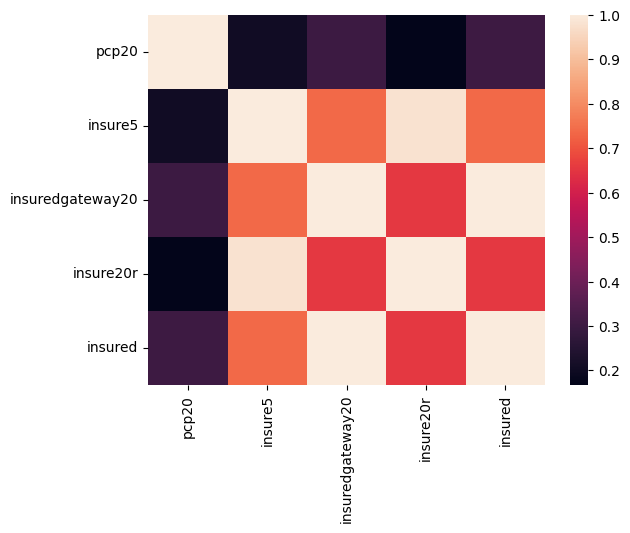

In [ ]:
health_insure = ['pcp20', 'insure5', 'insuredgateway20', 'insure20r','insured']
corr_val = df_20[health_insure].corr()
sns.heatmap(corr_val)

In [ ]:
df_20 = df_20.drop(columns=['insuredgateway20', 'insure20r','insured', 'medplace', 'didntgetcare20', 'regularrx', 'skiprxcost'])


**CardioVascular Health**

<Axes: >

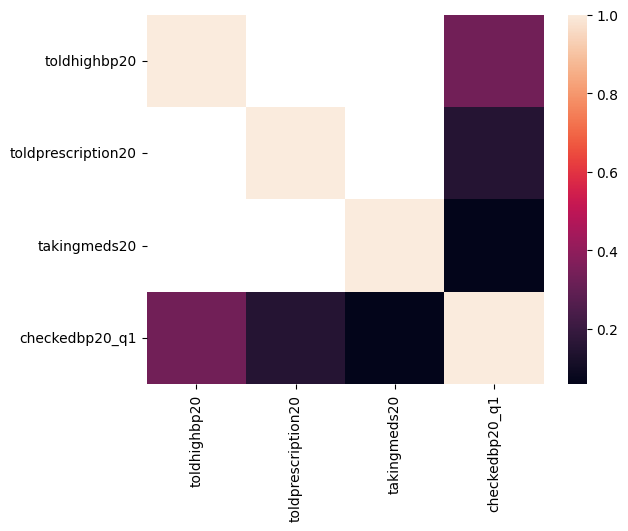

In [ ]:
card_resp = ['toldhighbp20', 'toldprescription20', 'takingmeds20', 'checkedbp20_q1']
corr_val = df_20[card_resp].corr()
sns.heatmap(corr_val)

In [ ]:
df_20 = df_20.drop(columns=['checkedbp20_q1'])


**Diabeties**

The survey contains foue questuions related to diabeties. We remove the all feature related to our target variable (Diabeties), to avoid any data leakage

In [ ]:
df_20 = df_20.drop(columns=['diabetes20', 'ageatdiabetes', 'diabcntrlmeds', 'toohighblsugar'])


**Asthma**

The data contains four feature (responses) related to Asthma. This topic was recently included in the survey of 2020. To maaintain the consistency across the years we remove this feature.

In [ ]:
df_20 = df_20.drop (columns = [ 'everasthma', 'currentasthma20', 'stillasthmaall', 'firsttoldasthma',])

**Mental Health**

The dataset consist of total 12 question focusing on the mental state of the participants. We found that there was one feature (k6), which is obtained by agregating over the other feature. The same is visible throgh the correlation analysis done below. Thus to prevent the redundant features, we only keep the k6 scire and remove the other features.

<Axes: >

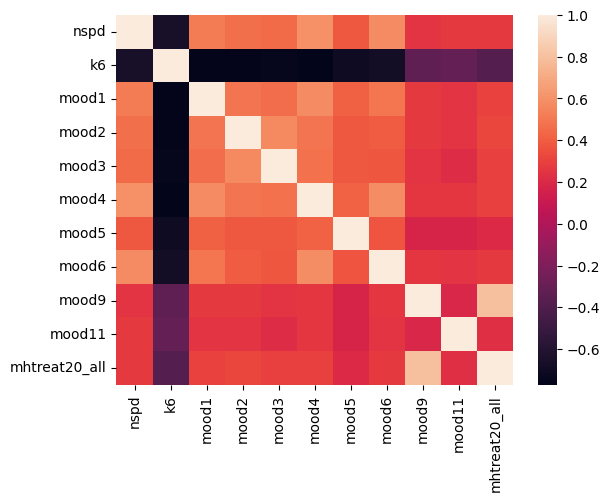

In [ ]:
import seaborn as sns
corr_val = df_20[['nspd', 'k6', 'mood1', 'mood2', 'mood3', 'mood4', 'mood5', 'mood6', 'mood9',
    'mood11','mhtreat20_all']].corr()
sns.heatmap(corr_val)

In [ ]:
df_20 = df_20.drop(columns=['nspd', 'mood1', 'mood2', 'mood3', 'mood4', 'mood5', 'mood6', 'mood9',
    'mood11','mhtreat20_all'])

**Housing and Neighborhood Environment**

We found a total of 12 questions in this section. However, responses to majority of these are private and not shared. Further most of them were included recently in the year 2020. So we remove these features from our analysis.

In [ ]:
housing_feat = ['delaypayrent', 'workingac_q1', 'rodentsstreet', 'helpneighbors20_q1', 'discussissues', 'helpcommproj', 'didntcleandog', 'trustkeys', 'proudneigh']
df_20 = df_20.drop(columns=housing_feat)

**TOBACCO AND SECOND HAND SMOKING**

In the survey there were total 17 questions associated with the smoking. Below we show the stastical analysis on these features which shows that a lot of them are having large NAN responses and thus we remove those columns from our study. We further do correlation analysis on the remaining two features and found no correlation between them. Thus, we only include the two features (' smoker' and 'smokecat') in our study.

In [ ]:
Tobacco_resp = ['smoker', 'everyday', 'numberperdaya', 'cpd20a', 'heavysmoker20a', 'everydaycpda', 'smokecat', 'mentholcigs20', 'sourcelastcig', 'cost20cigarettes', 'cigpurchase20', 'cigarillo20_q1', 'smokeecig12m20_q1', 'smokeecig30days20_q1', 'likedecigsflavs_q1', 'smokehookah12m_q1', 'smellcigsmoke20_q1']
df_20[Tobacco_resp].describe()

,smoker,everyday,numberperdaya,cpd20a,heavysmoker20a,everydaycpda,smokecat,mentholcigs20,sourcelastcig,cost20cigarettes,cigpurchase20,cigarillo20_q1,smokeecig12m20_q1,smokeecig30days20_q1,likedecigsflavs_q1,smokehookah12m_q1,smellcigsmoke20_q1
count,8753.000000,942.000000,942.000000,942.000000,942.000000,555.000000,8753.000000,939.000000,937.000000,792.000000,818.000000,4325.000000,4329.000000,348.000000,344.000000,4329.000000,4303.000000
mean,1.547926,1.410828,6.853658,1.367304,1.831210,1.614414,3.758254,1.498403,2.232657,11.555720,1.420538,1.983584,1.921691,2.442529,1.752907,1.943636,3.955380
std,0.829511,0.492245,6.706847,0.518431,0.374765,0.546543,0.734877,0.523181,0.856898,4.119269,0.716423,0.127084,0.276319,0.735769,0.431950,0.251726,1.424648
min,1.000000,1.000000,0.033223,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.410503,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,10.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,1.000000,1.000000,5.000000,1.000000,2.000000,2.000000,4.000000,1.000000,2.000000,12.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,5.000000
75%,2.000000,2.000000,10.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,14.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,5.000000
max,3.000000,2.000000,50.000000,3.000000,2.000000,3.000000,4.000000,3.000000,5.000000,40.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,5.000000


<Axes: >

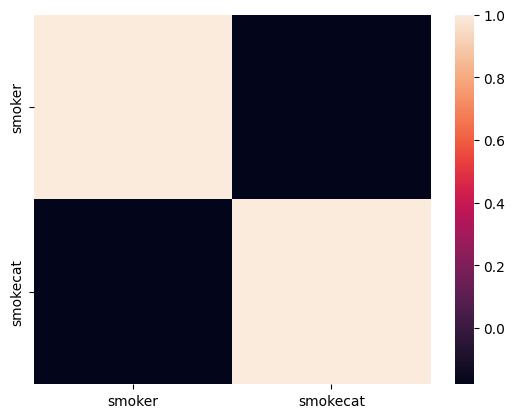

In [ ]:
corr_val = df_20[['smoker', 'smokecat']].corr()
sns.heatmap(corr_val)

In [ ]:
df_20 = df_20.drop(columns=['everyday', 'numberperdaya', 'cpd20a', 'heavysmoker20a', 'everydaycpda', 'mentholcigs20', 'sourcelastcig', 'cost20cigarettes', 'cigpurchase20', 'cigarillo20_q1', 'smokeecig12m20_q1', 'smokeecig30days20_q1', 'likedecigsflavs_q1', 'smokehookah12m_q1', 'smellcigsmoke20_q1'])

**Demographics: Age**

We found a total of 9 question on the age in the survey response sheet. The queations are posed in a one-hot set-up and we think considering all of them would be redundant. Thus we only include one response ('agegroup5') in our futher analysis and drop the remaining.

In [ ]:
Age_resp = ['agegroup', 'agegroup5', 'agegroup6', 'age21up', 'age25up', 'age40new', 'age45up', 'age50up', 'age18_64']
df_20 = df_20.drop(columns=Age_resp)

**Demographics: Sex**

In [ ]:
df_20['birthsex'].describe()

count    8752.000000
mean        1.560101
std         0.496403
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: birthsex, dtype: float64

**Demographics: Race**

There are two question realted to race in the survey, however we found that the two are just a different version. So we drop one of them.

In [ ]:
rac_resp = ['newrace', 'newrace6']
df_20[rac_resp].describe()

,newrace,newrace6
count,8781.000000,8781.000000
mean,2.357818,2.434347
std,1.176058,1.280456
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,5.000000,6.000000


In [ ]:
df_20 = df_20.drop(columns = ['newrace6'])

**Demographics: Others**

The survey consisted some other questions related to the demohgraphics like birth country, marital status, sexual preferance, education, hhsize, employment and poverty group. We consider all these feature in our study.

**Immunization**

The dataset contains two recorded variable related to immunization. Below id the statistcial description of both the variable. We drop one variable ('whereflu20') because of less responses.

In [ ]:
immun_resp = ['fluvaccineshot', 'whereflu20']
df_20[immun_resp].describe()

,fluvaccineshot,whereflu20
count,8724.000000,4528.000000
mean,1.479253,2.096069
std,0.499598,1.109751
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,2.000000,5.000000


In [ ]:
df_20 = df_20.drop(columns = ['whereflu20'])

**Nutrition**

<Axes: >

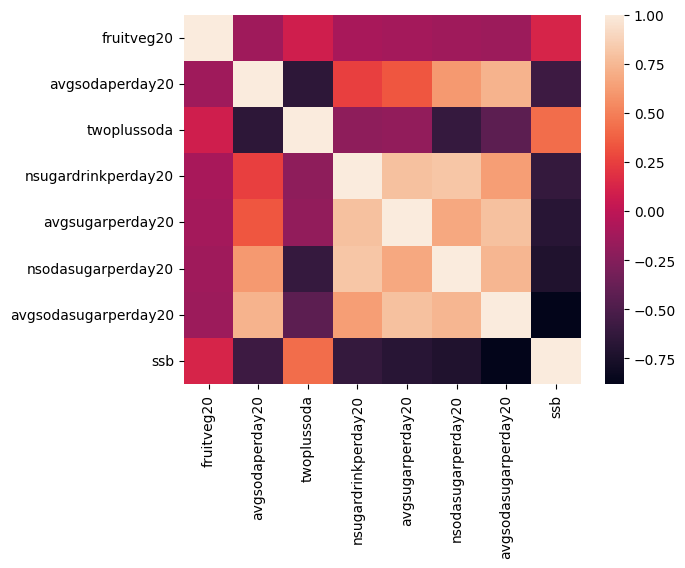

In [ ]:
nutr_resp = ['fruitveg20', 'avgsodaperday20', 'twoplussoda', 'nsugardrinkperday20', 'avgsugarperday20', 'nsodasugarperday20', 'avgsodasugarperday20', 'ssb']
sns.heatmap(df_20[nutr_resp].corr())

**Physical Activity**

In [ ]:
physact_resp = ['exercise20', 'cyclingfreq', 'cycling20']
df_20 = df_20.drop(columns=['swim', 'cyclingfreq', 'cycling20'])

**Cancer Screening**

In [ ]:
cancscreen_resp = [ 'evercolon20', 'colonoscopy10yr20', 'evercolon20_45', 'colonoscopy10yr_45']
df_20[cancscreen_resp].describe()

,evercolon20,colonoscopy10yr20,evercolon20_45,colonoscopy10yr_45
count,4094.000000,4066.000000,4853.000000,4822.000000
mean,1.216414,1.274471,1.290542,1.344463
std,0.411850,0.446302,0.454059,0.475242
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000


In [ ]:
df_20 = df_20.drop(columns=cancscreen_resp)

**HIV Testing**

<Axes: >

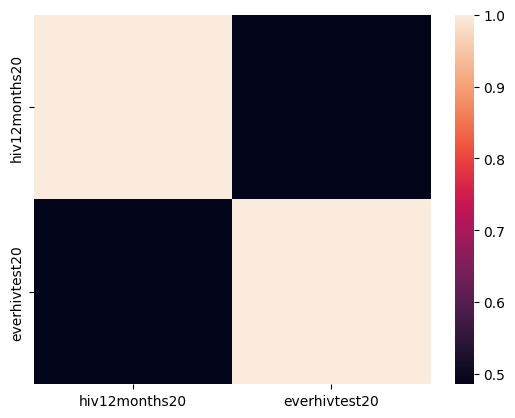

In [ ]:
sns.heatmap(df_20[['hiv12months20','everhivtest20']].corr())

**Sexual Behaviour**


We drop the questions related to the sexual behaviour, due to their sensitive nature.

In [ ]:
sexbehav_responses = ['condom20', 'analsex', 'analstdtest', 'analsexcondomuse20', 'sexbehav_active20', 'wsw', 'wswexclusive', 'sexuallyactive20', 'sexpartner', 'everheardofprep', 'everusedprep20', 'msm', 'msmexclusive', 'bthcontrollastsex20_q1', 'condomusetrend']
df_20 = df_20.drop(columns=sexbehav_responses)

In [ ]:
df_20 = df_20.drop(columns=['ipvphy', 'insultipv'])


**Administrative records**

In [ ]:
df_20 = df_20.drop(columns=['cid', 'strata', 'survey', 'wt21_dual', 'wt21_dual_q1', 'strata_q1', 'qxvers'])


**Alcohol Use**

<Axes: >

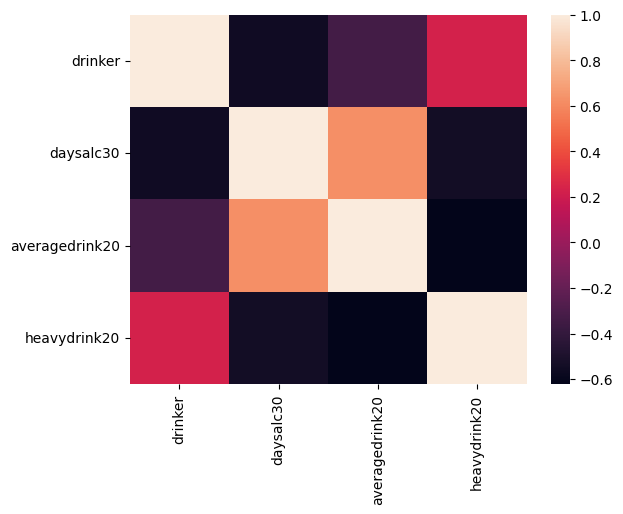

In [ ]:
drink_resp = ['drinker', 'daysalc30', 'averagedrink20', 'heavydrink20']
corr_val = df_20[drink_resp].corr()
sns.heatmap(corr_val)


In [ ]:
feat_filtered.extend(['averagedrink20'])
df_20 = df_20.drop(columns = ['averagedrink20'])

In [ ]:
insurance_mapping = {1: 'Private', 2: 'Medicare', 3: 'Medicaid',
                     4 : 'Other', 5: 'Uninsured'}
marital_mapping = {1: 'Married', 2: 'Divorced',
                   3: 'Widowed', 4: 'Separated',
                   5: 'Never_Married', 6: 'Unmarried_livin'}
race_mapping = {1: 'White_N_Afr_Eastern_Non_hispanic', 2: 'Black_non_hispanic',
                3: 'Hispanic', 4: 'Asian_Non_hispanic', 5: 'Other_non_hispanic'}
age_mapping = {1: '18_24', 2: '25_29',
               3: '30_44', 4: '45_64', 5: 'above_65'}
sex_mapping = {1: 'Male', 2: 'Female'}
usborn_mapping = {1: 'US_born', 2: 'Foreign_born'}
education_mapping = {1: 'less_than_high_school', 2: 'high_school_grad',
                     3: 'technical_school', 4: 'college_grad'}
emp_mapping = {1: 'Employed', 2: 'Unemployed',
               3: 'Not_in_labour_force'}
everyday_smoke_mapping = {1: 'less_than_10', 2: '10_to_21', 3: 'more_than_21'}
smokerCat_mapping = {1:'Non_daily_smoker', 2: 'Daily_smoker', 3: 'Heavy_daily_smoker',
                     4:'Non-smoker'}


In [ ]:
def perform_mapping(df, year):
  df['insure'] = df['insure5'].map(insurance_mapping)
  df['insured'] = np.where(df['insured'].isna(), df[f"insuredgateway{year}"], df['insured'])
  df['smokecat'] = df['smokecat'].map(smokerCat_mapping)
  df['everydaycpda'] = df['everydaycpda'].map(everyday_smoke_mapping)
  df['emp'] = df['emp3'].map(emp_mapping)
  df['education'] = df['education'].map(education_mapping)
  df['usborn'] = df['usborn'].map(usborn_mapping)
  feature_sex_name = 'sex' if int(year) < 18 else 'birthsex'
  df[feature_sex_name] = df[feature_sex_name].map(sex_mapping)
  df['agegroup5'] = df['agegroup5'].map(age_mapping)
  df['newrace'] = df['newrace'].map(race_mapping)
  df[f"maritalstatus{year}"] = df[f"maritalstatus{year}"].map(marital_mapping)
  return df

In [ ]:
def get_bmi_class(bmi):
  if bmi < 18.5:
    return 1
  elif bmi>=18.5 and bmi < 25:
    return 2
  elif bmi>=25 and bmi <30:
    return 3
  elif bmi>=30 and bmi <35:
    return 4
  else:
    return 5

In [ ]:
def get_cleaned_data(df, year):
  feature_sex_name = 'sex' if int(year) < 18 else 'birthsex'

  encoded_df = pd.get_dummies(df, columns=['insure5', f"maritalstatus{year}", 'newrace',
                                         'agegroup5', feature_sex_name, 'usborn',
                                         f"sexualid{year}", 'education', 'emp3',
                                           'smokecat'])
  rows_drop = ['agegroup', 'generalhealth', f"pcp{year}", f"didntgetcare{year}", f"toldhighbp{year}",
             'smoker', f"employment{year}", f"avgsodaperday{year}",
            f"diabetes{year}"]
  encoded_df = encoded_df.dropna(subset=rows_drop)
  encoded_df.fillna({f"takingmeds{year}": 2, f"toldprescription{year}": 2,
                    'everyday': 2, 'numberperdaya': 0,
                      'insured':2, 'fluvaccineshot':2,
                    f"fruitveg{year}":1, f"nsugardrinkperday{year}":0, f"avgsugarperday{year}":1,
                    f"nsodasugarperday{year}":0, f"avgsodasugarperday{year}":1, 'ssb':2,
                    f"exercise{year}":2, f"hiv12months{year}":2, f"everhivtest{year}":2, 'drinker':2,
                    'daysalc30':0, f"averagedrink{year}" :0, f"heavydrink{year}":2, 'bingenew':2,
                    }, inplace=True)
  encoded_df = encoded_df[['imputed_povertygroup',
                           'generalhealth', f"pcp{year}", f"didntgetcare{year}",
                          f"toldhighbp{year}", f"toldprescription{year}", f"takingmeds{year}",
                          'smoker', 'bmi', f"weight{year}in5", 'fluvaccineshot', f"fruitveg{year}", f"avgsodaperday{year}",
                          f"nsugardrinkperday{year}", f"avgsugarperday{year}", f"nsodasugarperday{year}", f"avgsodasugarperday{year}",
                          'ssb', f"exercise{year}", f"hiv12months{year}", f"everhivtest{year}",
                          'drinker', 'daysalc30', f"averagedrink{year}", 'hhsize', 'insure5_Medicaid',
                          'insure5_Medicare', 'insure5_Other', 'insure5_Private', 'insure5_Uninsured',
                          'newrace_Asian_Non_hispanic', 'newrace_Black_non_hispanic', 'newrace_Hispanic',
                          'newrace_White_N_Afr_Eastern_Non_hispanic', 'newrace_Other_non_hispanic',
                          'agegroup5_18_24', 'agegroup5_25_29', 'agegroup5_30_44', 'agegroup5_45_64',
                          'agegroup5_above_65', f"{feature_sex_name}_Female", f"{feature_sex_name}_Male",
                           'usborn_Foreign_born',
                          'usborn_US_born', 'education_college_grad', 'education_high_school_grad',
                          'education_less_than_high_school', 'education_technical_school',
                          'emp3_Employed', 'emp3_Not_in_labour_force', 'emp3_Unemployed',
                          'smokecat_Daily_smoker', 'smokecat_Heavy_daily_smoker', 'smokecat_Non-smoker',
                          'smokecat_Non_daily_smoker', f"diabetes{year}"]]
  encoded_df.fillna({'bmi': encoded_df['bmi'].mean()}, inplace = True)
  encoded_df[f"weight{year}in5"] = encoded_df.apply(lambda row : get_bmi_class(row['bmi']) if np.isnan(row[f"weight{year}in5"])
  else row[f"weight{year}in5"], axis=1)
  return encoded_df